In [26]:
import seaborn as sns
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import Orange
import numpy as np
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

# Load data

In [51]:
logfile_name = 'results.txt'
auroc_columns = ['Drug', 'Dataset', 'Auroc', 'Method']
auprc_columns = ['Drug', 'Dataset', 'Auprc', 'Method']
auroc_table_columns = ['Drug', 'Dataset', 'Auroc', 'Method']
auprc_table_columns = ['Drug', 'Dataset', 'Auprc', 'Method']

auroc_result_dataframe = pd.DataFrame(columns=auroc_columns)
auprc_result_dataframe = pd.DataFrame(columns=auprc_columns)
result_path_super_felt = Path('..', 'results', 'experiments')
result_paths = [result_path_super_felt]
method_folder = ['classifier_supervised-e', 'noisy_supervised-e', 'noisy_supervised-ae',
                'noisy_classifier_supervised-ae', 'noisy_classifier_supervised-e']

for result_path in result_paths:
    drug_paths =  [x for x in result_path.iterdir()]
    for drug_path in drug_paths:
        drug = drug_path.stem
        # method_folder = [path.stem for path in drug_path.iterdir()]
        for logfile_folder in method_folder:
            method = logfile_folder
            log_path = drug_path / logfile_folder / logfile_name
            test_aupcr = []
            extern_auprc = []
            if log_path.is_file():
                with open(log_path, 'r') as log_file:
                    for line in log_file:
                        if f'extern auroc mean' in line:
                            extern_auroc_mean = float(line.split(':')[-1])
                        if f'extern auprc mean' in line:
                            extern_auprc_mean = float(line.split(':')[-1])
                        if f'test auroc mean' in line:
                            test_auroc_mean = float(line.split(':')[-1])
                        if f'test auprc mean' in line:
                            test_auprc_mean = float(line.split(':')[-1])

                    auroc_result_dataframe = auroc_result_dataframe.append(
                        pd.DataFrame([[drug, f'Test', test_auroc_mean, method]], columns=auroc_columns))
                    auroc_result_dataframe = auroc_result_dataframe.append(
                        pd.DataFrame([[drug, f'Extern', extern_auroc_mean, method]], columns=auroc_columns))
                    auprc_result_dataframe = auprc_result_dataframe.append(
                        pd.DataFrame([[drug, f'Test', test_auprc_mean, method]], columns=auprc_columns))
                    auprc_result_dataframe = auprc_result_dataframe.append(
                        pd.DataFrame([[drug, f'Extern', extern_auprc_mean, method]], columns=auprc_columns))

## Beautify strings

## Calculate critical test difference

In [52]:
auroc_ranking_test.tail(20).sort_values(by='Auroc')

,Auroc
Method,
noisy_supervised-ae,1.714286
noisy_supervised-e,2.285714
classifier_supervised-e,2.428571
noisy_classifier_supervised-ae,3.571429


In [53]:
mean_results_df_auroc = auroc_result_dataframe.groupby(['Method', 'Drug', 'Dataset']).mean()
mean_results_df_auprc = auprc_result_dataframe.groupby(['Method', 'Drug', 'Dataset']).mean()


test_auroc_mean_results_df = mean_results_df_auroc.loc[:, :, 'Test']
test_auprc_mean_results_df = mean_results_df_auprc.loc[:, :, 'Test']


auroc_ranking_test = test_auroc_mean_results_df.groupby('Drug').rank(axis=0, ascending=False)\
.groupby(['Method']).mean()
auprc_ranking_test = test_auprc_mean_results_df.groupby('Drug').rank(axis=0, ascending=False)\
.groupby(['Method']).mean()

number_of_datasets  = 7

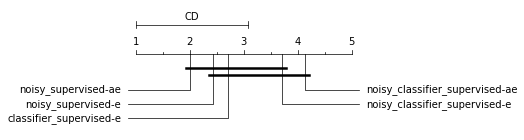

In [54]:
critical_difference = Orange.evaluation.compute_CD(auroc_ranking_test, 
                                                   number_of_datasets, alpha='0.1')
Orange.evaluation.graph_ranks(auroc_ranking_test.values.squeeze(), auroc_ranking_test.index,
                              cd=critical_difference, width=6, textspace=1.5)
plt.savefig('experiments/variant_critical_difference_test_auroc.pdf', bbox_inches = "tight")

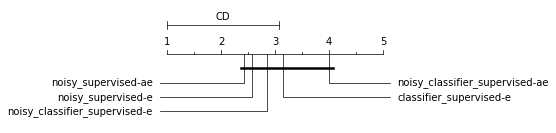

In [55]:
critical_difference = Orange.evaluation.compute_CD(auprc_ranking_test, number_of_datasets, alpha='0.1')
Orange.evaluation.graph_ranks(auprc_ranking_test.values.squeeze(), auprc_ranking_test.index, 
                              cd=critical_difference, width=6, textspace=1.5)
plt.savefig('experiments/variant_critical_difference_test_auprc.pdf', bbox_inches = "tight")

## Calculate critical extern difference

In [56]:
mean_results_df_auroc = auroc_result_dataframe.groupby(['Method', 'Drug', 'Dataset']).median()
mean_results_df_auprc = auprc_result_dataframe.groupby(['Method', 'Drug', 'Dataset']).median()


extern_auroc_mean_results_df = mean_results_df_auroc.loc[:, :, 'Extern']
extern_auprc_mean_results_df = mean_results_df_auprc.loc[:, :, 'Extern']

auroc_ranking_extern = extern_auroc_mean_results_df.groupby('Drug').rank(axis=0, ascending=False)\
.groupby(['Method']).mean()
auprc_ranking_extern = extern_auprc_mean_results_df.groupby('Drug').rank(axis=0, ascending=False)\
.groupby(['Method']).mean()

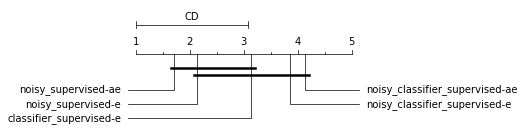

In [57]:
critical_difference = Orange.evaluation.compute_CD(auroc_ranking_extern, 
                                                   number_of_datasets, alpha='0.1')
Orange.evaluation.graph_ranks(auroc_ranking_extern.values.squeeze(),
                              auroc_ranking_extern.index,
                              cd=critical_difference, width=6, textspace=1.5)
plt.savefig('experiments/variant_critical_difference_extern_auroc.pdf', bbox_inches = "tight")

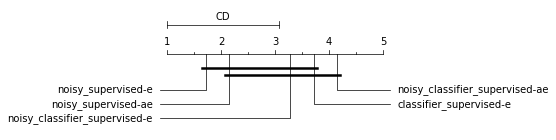

In [58]:
critical_difference = Orange.evaluation.compute_CD(auprc_ranking_extern, number_of_datasets, alpha='0.1')
Orange.evaluation.graph_ranks(auprc_ranking_extern.values.squeeze(), 
                              auprc_ranking_extern.index, cd=critical_difference, \
                              width=6, textspace=1.5)
plt.savefig('experiments/variant_critical_difference_extern_auprc.pdf', bbox_inches = "tight")